_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_30 (LSTM)               (None, 4)                 96        
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
198/198 [==============================] - 9s 44ms/step - loss: 0.6738 - acc: 0.6616
Epoch 2/10
198/198 [==============================] - 6s 29ms/step - loss: 0.6425 - acc: 0.6667
Epoch 3/10
198/198 [==============================] - 6s 30ms/step - loss: 0.6214 - acc: 0.6667
Epoch 4/10
198/198 [==============================] - 6s 29ms/step - loss: 0.5967 - acc: 0.6667
Epoch 5/10
198/198 [==============================] - 6s 29ms/step - loss: 0.5797 - acc: 0.6717
Epoch 6/10
198/198 [==============================] - 6

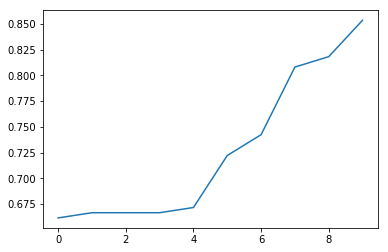

In [38]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# LSTM for sequence classification in the fall dataset
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.layers import Dropout
from keras.preprocessing import sequence

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

#falls = df[df['isFall']==1]

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# fix random seed for reproducibility
numpy.random.seed(7)

scaler = MinMaxScaler()

train_df = pd.read_csv('Boyu_wrist.csv',index_col=0)
train_df = train_df.drop(['activity'],axis=1)
cols = train_df.columns.values.tolist()
train_df = scaler.fit_transform(train_df)
train_df = pd.DataFrame(train_df, columns=cols)
y_train = train_df['isFall']
X_train = train_df.drop(['isFall'],axis=1)
X_train= np.reshape(X_train.as_matrix(),(X_train.shape[0],X_train.shape[1],1))

test_df = pd.read_csv('Joon_wrist.csv',index_col=0)
test_df = test_df.drop(['activity'],axis=1)
test_df = scaler.fit_transform(test_df)
test_df = pd.DataFrame(test_df, columns=cols)
y_test = test_df['isFall']
X_test = test_df.drop(['isFall'],axis=1) 
X_test= np.reshape(X_test.as_matrix(),(X_test.shape[0],X_test.shape[1],1))
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

input_dim = 12
output_dim = 1
memory_units = 100

#model.add(LSTM(150, input_shape=(64, 7, 339), return_sequences=False))

model = Sequential()
#model.add(Dense(12, input_dim=input_dim))
model.add(LSTM(4, input_shape=(input_dim, 1), dropout=0.2, recurrent_dropout=0.2))
#model.add(Dropout(0.2))
#model.add(LSTM(memory_units))
#model.add(Dropout(0.2))

#model.add(Embedding(input_dim, output_dim))
#model.add(Conv1D(filters=3, kernel_size=3, activation='relu'))
#model.add(MaxPooling1D(pool_size=2))
#model.add(LSTM(memory_units, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

print(model.summary())
prediction = model.fit(X_train, y_train, epochs=10,verbose=1,batch_size=1)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, batch_size=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

#classes = model.predict(x_test, batch_size=1)

# plot metrics
plt.plot(prediction.history['acc'])
plt.show()
